In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# Create an engine that can talk to the database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
# pass in database connection, and use it to prepare my base class
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
# Create a session 
session = Session(engine)

In [9]:
conn = engine.connect()
data = engine.execute("SELECT * FROM station;")

for record in data: 
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [10]:
data_msmt = pd.read_sql("SELECT * FROM measurement", conn)
data_msmt.head()


,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
data_station = pd.read_sql("SELECT * FROM station", conn)
data_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [12]:
# Inspect the data
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [13]:
Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [14]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11e541d30>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [15]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11e55a320>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [16]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [17]:
columns = inspector.get_columns('station')
for column in columns: 
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
columns = inspector.get_columns('measurement')
for column in columns: 
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [19]:
session.query(Measurement.date).all()

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-30'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-03'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-28'),
 ('2010-03-01'),
 ('2010-03-02'),
 ('2010-03-03'),
 ('2010-03-04'),
 ('2010-03-05'),
 ('2010-03-06'),
 ('2010-03-07'

# Exploratory Climate Analysis

In [20]:
data_msmt_dates = data_msmt.sort_values("date", ascending=False)
data_msmt_dates.head()

,id,station,date,prcp,tobs
19549,19550,USC00516128,2017-08-23,0.45,76.0
12186,12187,USC00519523,2017-08-23,0.08,82.0
2723,2724,USC00519397,2017-08-23,0.00,81.0
7634,7635,USC00514830,2017-08-23,0.00,82.0
12185,12186,USC00519523,2017-08-22,0.00,82.0


Text(0, 0.5, 'precipitation')

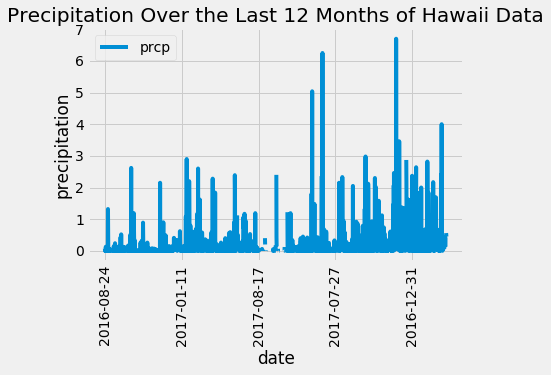

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# date 2017-08-23
# prcp
# Calculate the date 1 year ago from the last data point in the database
# 10.3.3
# https://docs.sqlalchemy.org/en/13/core/type_basics.html?highlight=timedelta
# https://www.geeksforgeeks.org/python-datetime-timedelta-function/
last_date = dt.datetime(2017, 8, 23)
last_twelve_mos = last_date - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
twelve_mos_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_twelve_mos).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
# precip_df = pd.DataFrame(twelve_mos_precip.date, twelve_mos_precip.prcp)
# inplacebool, default False
# Modify the DataFrame in place (do not create a new object).
precip_df = pd.DataFrame(twelve_mos_precip, columns = ['date', 'prcp'])
precip_sorted_df = precip_df.sort_values(["date"], ascending=True)

precip_df.set_index(precip_df['date'], inplace=True)
# precip_df

# precip_sorted_df
# # pd.read_sql(session.query(twelve_mos_precip))
# # pd.read_sql(session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_twelve_mos).all())
# # # TypeError: read_sql() missing 1 required positional argument: 'con'


# # Sort the dataframe by date

# data_msmt_dates = data.sort_index("date", ascending=False)

# print(precip_df.dtypes)


# Use Pandas Plotting with Matplotlib to plot the data
# Comes out as a line graph
precip_df.plot(x='date', y='prcp', rot=90)
plt.title("Precipitation Over the Last 12 Months of Hawaii Data")
plt.xlabel("date")
plt.ylabel("precipitation")

In [58]:
precip_df = pd.DataFrame(twelve_mos_precip, columns = ['date', 'prcp'])
precip_df.set_index('date', inplace=True)
precip_df

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [59]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pd.DataFrame.describe(precip_df)

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [60]:
# Design a query to show how many stations are available in this dataset?
query = session.query(Measurement.station.distinct().label("station"))
station_unique = [row.station for row in query.all()]
station_unique

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [61]:
session.query(Measurement.station).distinct().count()

9

In [62]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# https://docs.sqlalchemy.org/en/13/orm/tutorial.html#counting
# active_stations = session.query(func.count(Measurement.station), Measurement.station).group_by(Measurement.station).all()
# .all will convert results to list, which can't be used with a method (like .order_by)

active_stations = (session.query(func.count(Measurement.station), Measurement.station).group_by(Measurement.station)).order_by(func.count(Measurement.station).desc()).all()

active_stations
          

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [63]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, -1.340000000000014, 'Temperature')

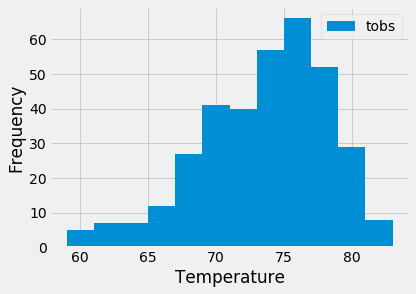

In [64]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date = dt.datetime(2017, 8, 23)
last_twelve_mos = last_date - dt.timedelta(days = 365)

hottest_station = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= last_twelve_mos).all()
hottest_station_df = pd.DataFrame(hottest_station, columns=['tobs'])
hottest_station_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")





In [69]:
# join dbs

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [71]:
#get list of column names and types
columns = inspector.get_columns('measurement')
for c in columns: 
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [72]:
#get list of column names and types
columns = inspector.get_columns('station')
for c in columns: 
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [82]:
session.query(Measurement.station, Station.station).limit(10).all()

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397')]

In [85]:
same_id = session.query(*sel).filter(Measurement.id == Measurement.id).limit(10).all()

for record in same_id: 
    (measurement, station) = record
    print(measurement.id)
    print(station.id)

ValueError: too many values to unpack (expected 2)

In [87]:
sel = [Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs, Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
same_id = session.query(*sel).filter(Measurement.id == Measurement.id).limit(10).all()

for record in same_id: 
    (measurement.station, measurement.date, measurement.prcp, measurement.tobs, station.station, station.station, station.name, station.latitude) = record
    print(
    f"{measaurement.station} {measurement.date} {measurement.prcp} {station.name} {station.latitude}")
    
    
# !!!  https://stackoverflow.com/questions/7053551/python-valueerror-too-many-values-to-unpack
    
    
    

ValueError: too many values to unpack (expected 8)